# WET-013: WEP Performance as a function of exposure time

Owner: **Bryce Kalmbach** [@jbkalmbach](https://github.com/lsst-sitcom/sitcomtn-133/issues/new?body=@jbkalmbach) <br>
Last Verified to Run: **2024-07-01** <br>
Software Version:
  - `ts_wep`: **9.5.8**

# Imports

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from lsst.daf.butler import Butler
from astropy.io import fits
from IPython.utils import io
from lsst.ts.wep.task.pairTask import ExposurePairer, ExposurePairerConfig
%matplotlib inline

In [2]:
path_to_aos_butler = '/sdf/data/rubin/repo/aos_imsim/'
butler = Butler(path_to_aos_butler)

## Load Data Id information

In [3]:
data_id = {'instrument': 'LSSTComCamSim', 'exposure': 7024072600001, 'band': 'r', 'detector': 4}
data_id_visit = {'instrument': 'LSSTComCamSim', 'exposure': 7024072600001, 'visit': 7024072600001, 'band': 'r', 'detector': 4}

In [4]:
exp_times = [10, 15, 20, 30, 45, 60, 90]

## Make Pair Table

In [5]:
config = ExposurePairerConfig()
pairer = ExposurePairer(config=config)

with io.capture_output() as captured:
    visitInfos = {
        v.dataId["exposure"]: butler.get("raw.visitInfo", dataId=v.dataId, collections='LSSTComCamSim/raw/all')
        for v in butler.registry.queryDatasets("raw", collections='LSSTComCamSim/raw/all', where='exposure > 7024072600000', dataId={'instrument': 'LSSTComCamSim'})
    }

In [6]:
sorted_visit_keys = list(visitInfos.keys())
sorted_visit_keys.sort()
visit_infos_sorted = {key: visitInfos[key] for key in sorted_visit_keys}

In [7]:
tables = pairer.makeTables(visit_infos_sorted)

In [8]:
tables

{'pairTable': <Table length=7>
     extra         intra     ... intra_focusZ      intra_rtp     
     int64         int64     ...   float64          float64      
 ------------- ------------- ... ------------ -------------------
 7024072600003 7024072600001 ...         -1.5 -359.78182915546705
 7024072600006 7024072600004 ...         -1.5  -359.7837449293443
 7024072600009 7024072600007 ...         -1.5 -359.78565674659967
 7024072600012 7024072600010 ...         -1.5  -359.7894685313364
 7024072600015 7024072600013 ...         -1.5 -359.79515665912555
 7024072600018 7024072600016 ...         -1.5 -359.80080944745976
 7024072600021 7024072600019 ...         -1.5  -359.8120095412792,
 'unusedIntraTable': <Table length=0>
 exposure    ra     dec     mjd    focusZ   rtp    radec  
                                                  deg,deg 
  int64   float64 float64 float64 float64 float64 SkyCoord
 -------- ------- ------- ------- ------- ------- --------,
 'unusedExtraTable': <Table lengt

In [9]:
# tables["pairTable"].write("scripts/WET-013_pair_table.ecsv", format="ascii.ecsv", overwrite=True)

In [10]:
# ! ingestPairTable.py scripts/WET-013_pair_table.ecsv -b $path_to_aos_butler -o WET-013/20240702T223722Z --instrument LSSTComCamSim

## Load Images

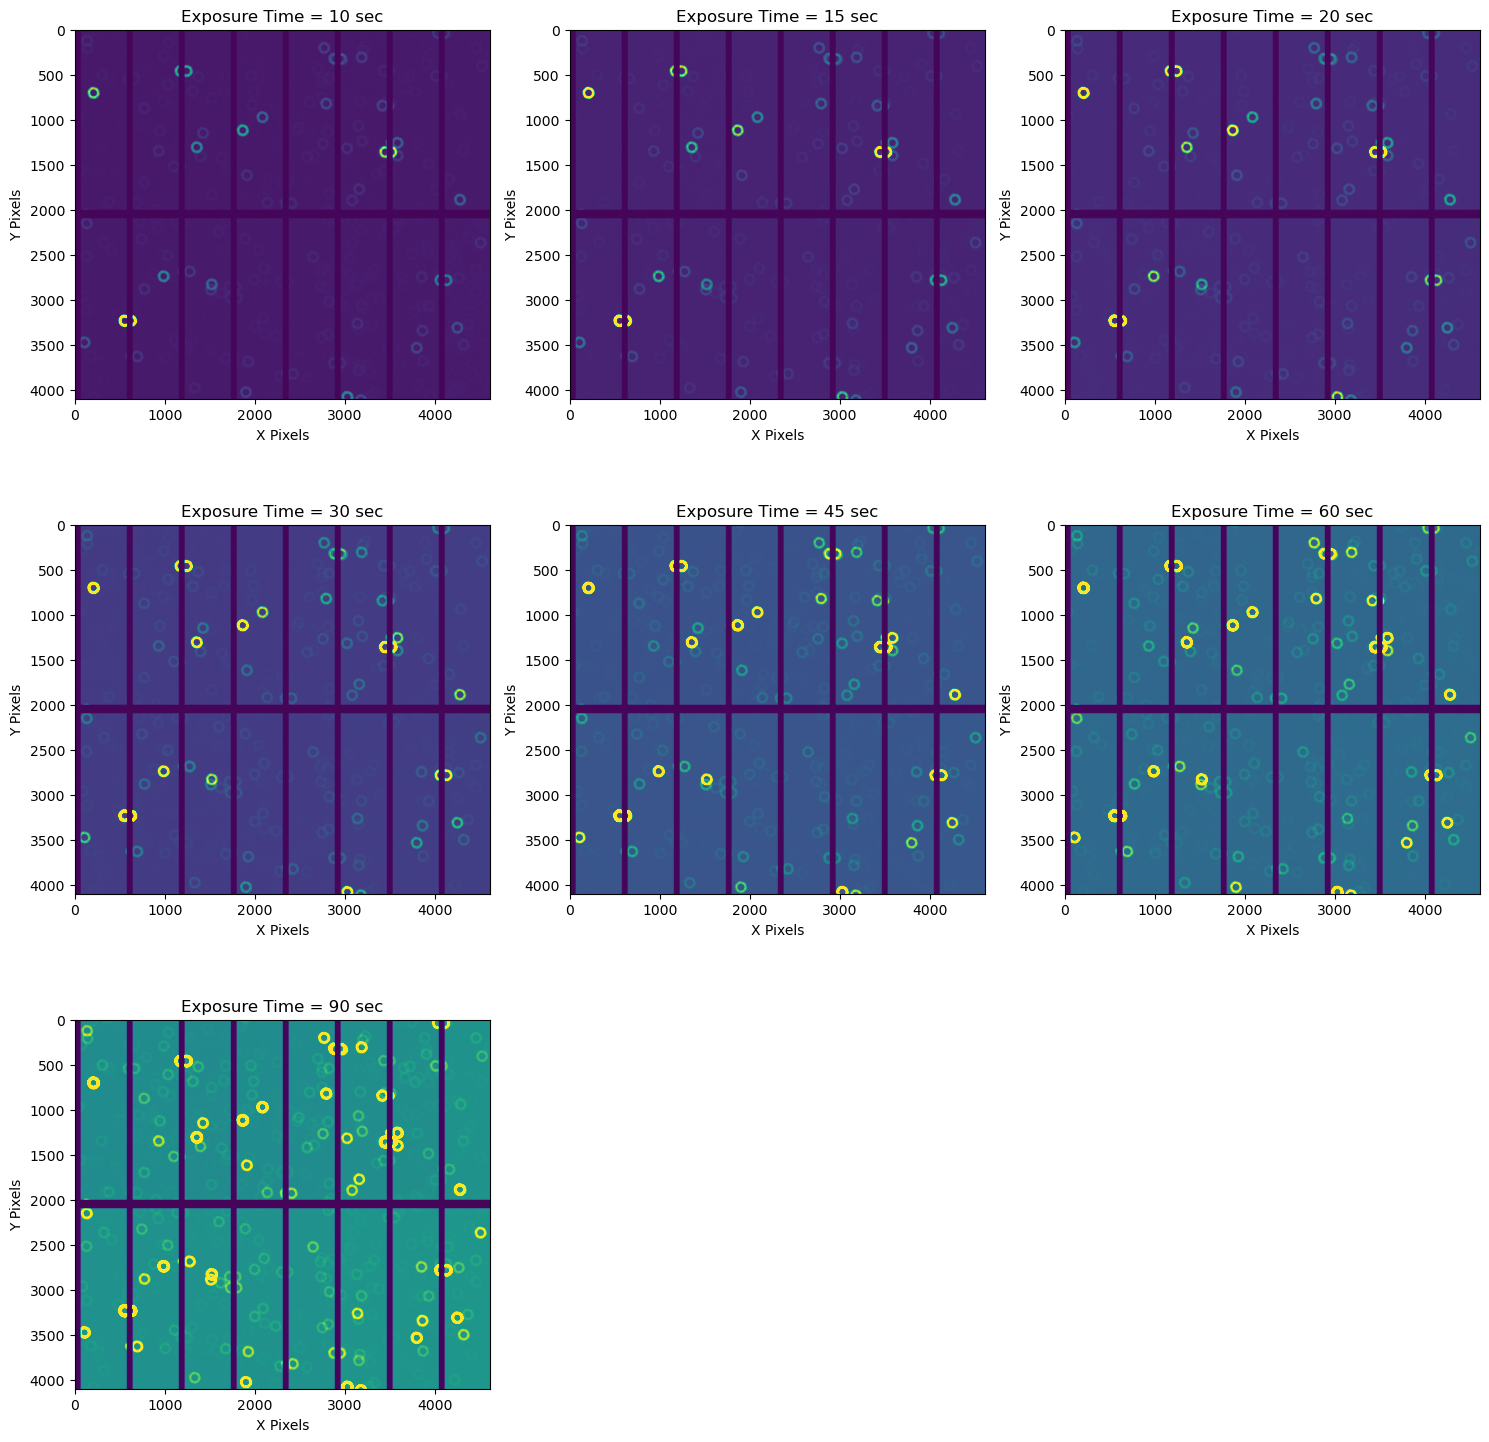

In [11]:
fig = plt.figure(figsize=(15, 15))
det_num = 4
for i, exp_time in zip(np.arange(1, 8), exp_times):
    fig.add_subplot(3,3,i)
    data_id['exposure'] = 7024072600000 + 3 + 3*(i-1)
    data_id['detector'] = det_num
    data_id_visit['exposure'] = 7024072600000 + 3 + 3*(i-1)
    data_id_visit['visit'] = 7024072600000 + 3 + 3*(i-1)
    data_id_visit['detector'] = det_num
    post_isr = butler.get('raw', dataId=data_id, collections='LSSTComCamSim/raw/all')
    plt.imshow(post_isr.image.array, vmax=4000)
    plt.xlabel('X Pixels')
    plt.ylabel('Y Pixels')
    plt.title(f'Exposure Time = {exp_time} sec')
    # donut_cat = butler.get('donutCatalog', dataId=data_id_visit, collections='u/brycek/wet-013/wcsGaiaCatalog')
    # plt.scatter(donut_cat['centroid_x'], donut_cat['centroid_y'], c='r', marker='x')
plt.tight_layout()
#plt.savefig('figures/raw_det_4.png')

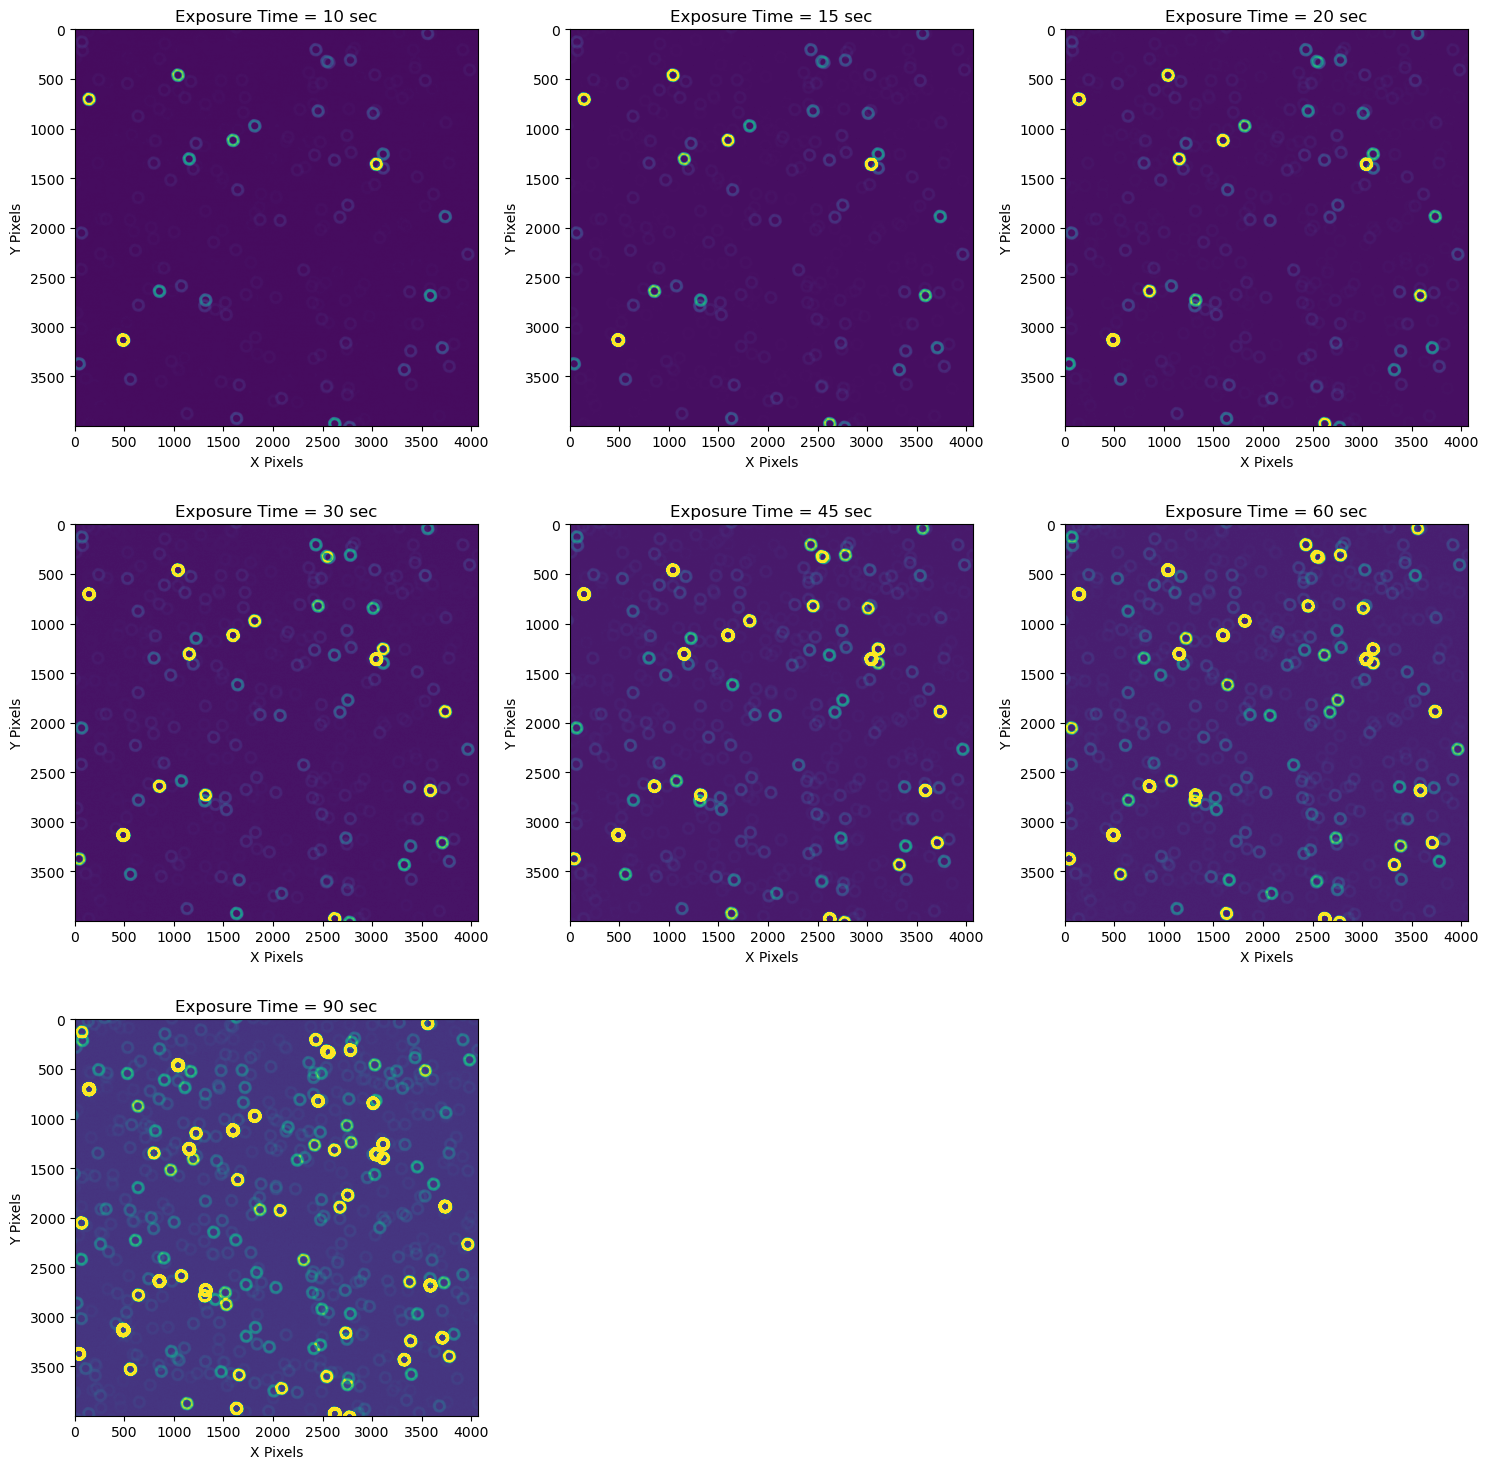

In [12]:
fig = plt.figure(figsize=(15, 15))
det_num = 4
for i, exp_time in zip(np.arange(1, 8), exp_times):
    fig.add_subplot(3,3,i)
    data_id['exposure'] = 7024072600000 + 3 + 3*(i-1)
    data_id['detector'] = det_num
    data_id_visit['exposure'] = 7024072600000 + 3 + 3*(i-1)
    data_id_visit['visit'] = 7024072600000 + 3 + 3*(i-1)
    data_id_visit['detector'] = det_num
    post_isr = butler.get('postISRCCD', dataId=data_id, collections='WET-013/wcsGaiaCatalog')
    plt.imshow(post_isr.image.array, vmax=4000)
    plt.xlabel('X Pixels')
    plt.ylabel('Y Pixels')
    plt.title(f'Exposure Time = {exp_time} sec')
    # donut_cat = butler.get('donutCatalog', dataId=data_id_visit, collections='WET-013/wcsGaiaCatalog')
    # plt.scatter(donut_cat['centroid_x'], donut_cat['centroid_y'], c='r', marker='x')
plt.tight_layout()
#plt.savefig('figures/post_isr_det_4.png')

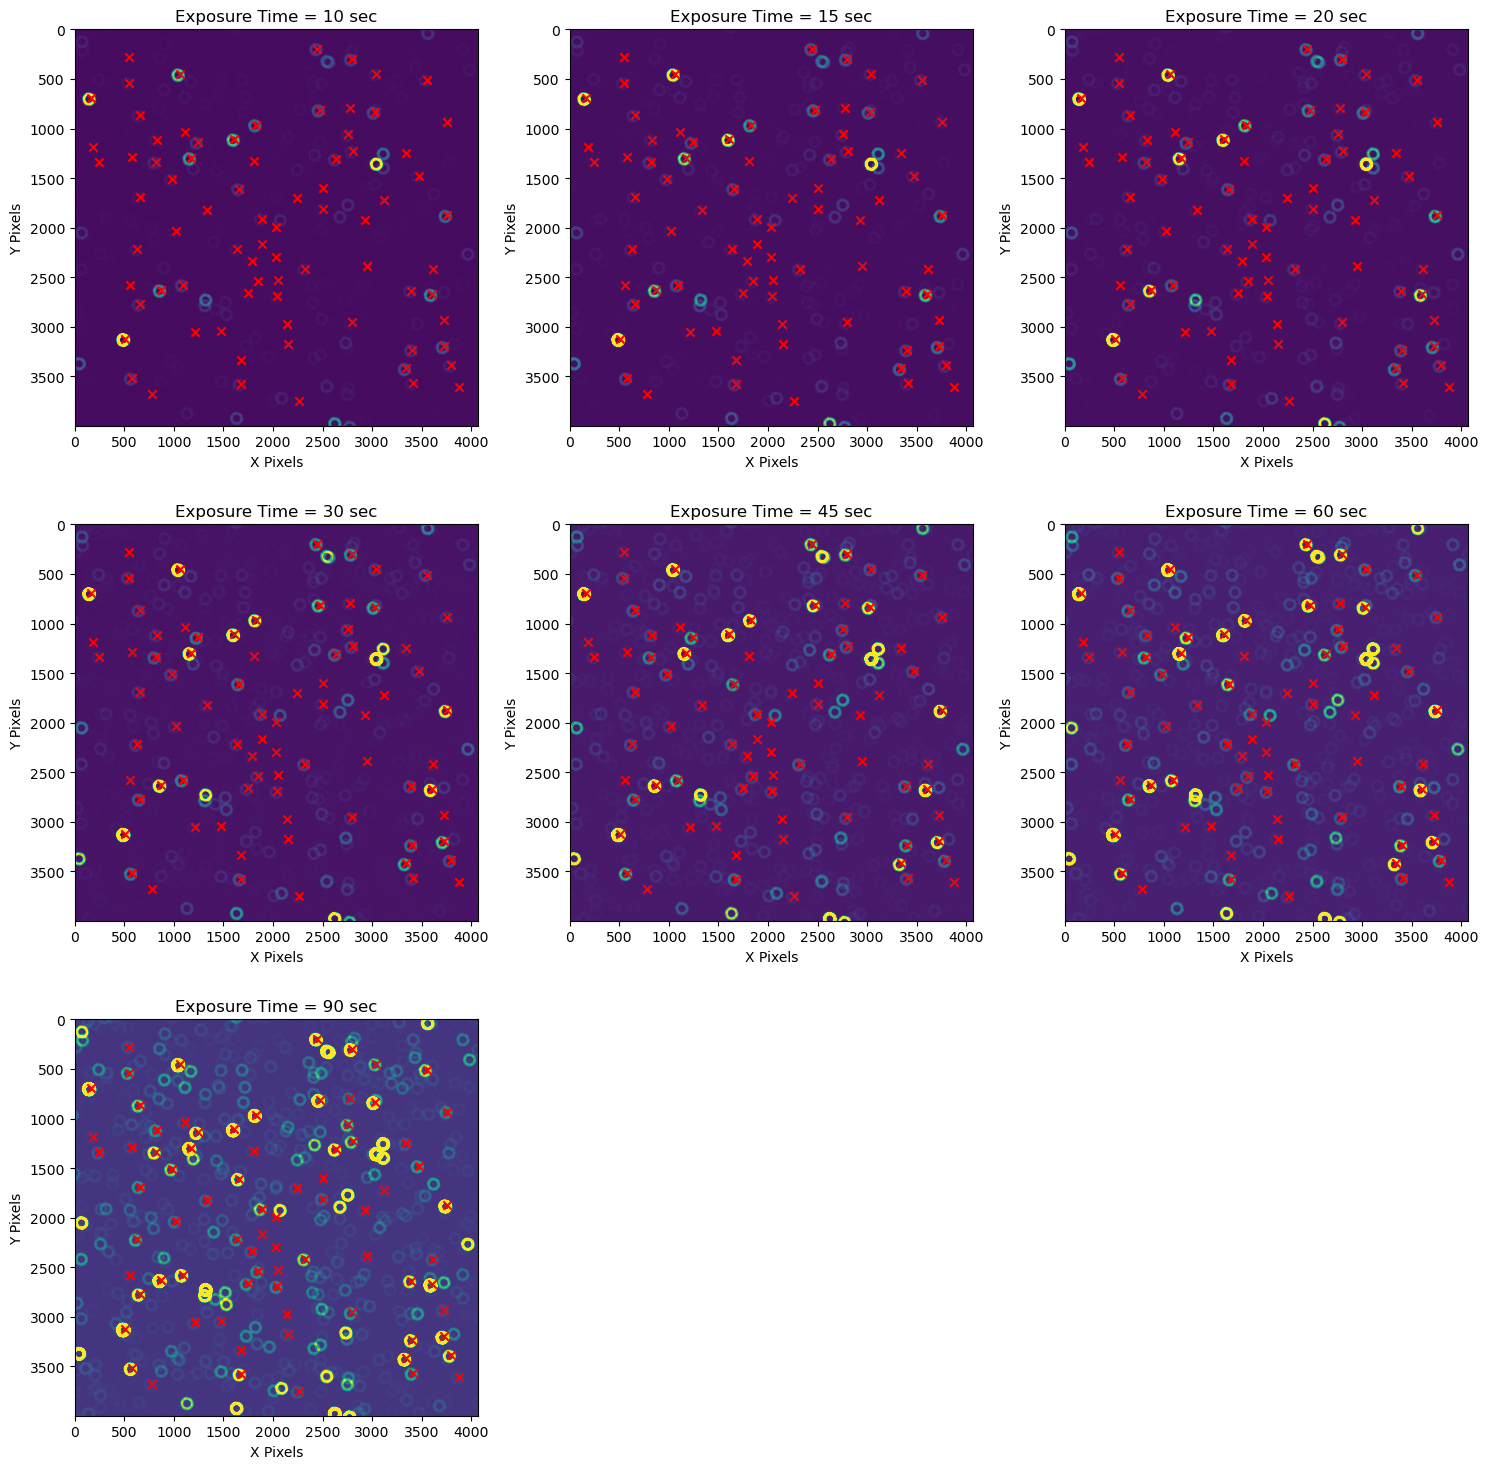

In [13]:
fig = plt.figure(figsize=(15, 15))
det_num = 4
for i, exp_time in zip(np.arange(1, 8), exp_times):
    fig.add_subplot(3,3,i)
    data_id['exposure'] = 7024072600000 + 3 + 3*(i-1)
    data_id['detector'] = det_num
    data_id_visit['exposure'] = 7024072600000 + 3 + 3*(i-1)
    data_id_visit['visit'] = 7024072600000 + 3 + 3*(i-1)
    data_id_visit['detector'] = det_num
    post_isr = butler.get('postISRCCD', dataId=data_id, collections='WET-013/wcsGaiaCatalog')
    plt.imshow(post_isr.image.array, vmax=4000)
    plt.xlabel('X Pixels')
    plt.ylabel('Y Pixels')
    plt.title(f'Exposure Time = {exp_time} sec')
    donut_cat = butler.get('donutCatalog', dataId=data_id_visit, collections='WET-013/wcsGaiaCatalog')
    plt.scatter(donut_cat['centroid_x'], donut_cat['centroid_y'], c='r', marker='x')
plt.tight_layout()


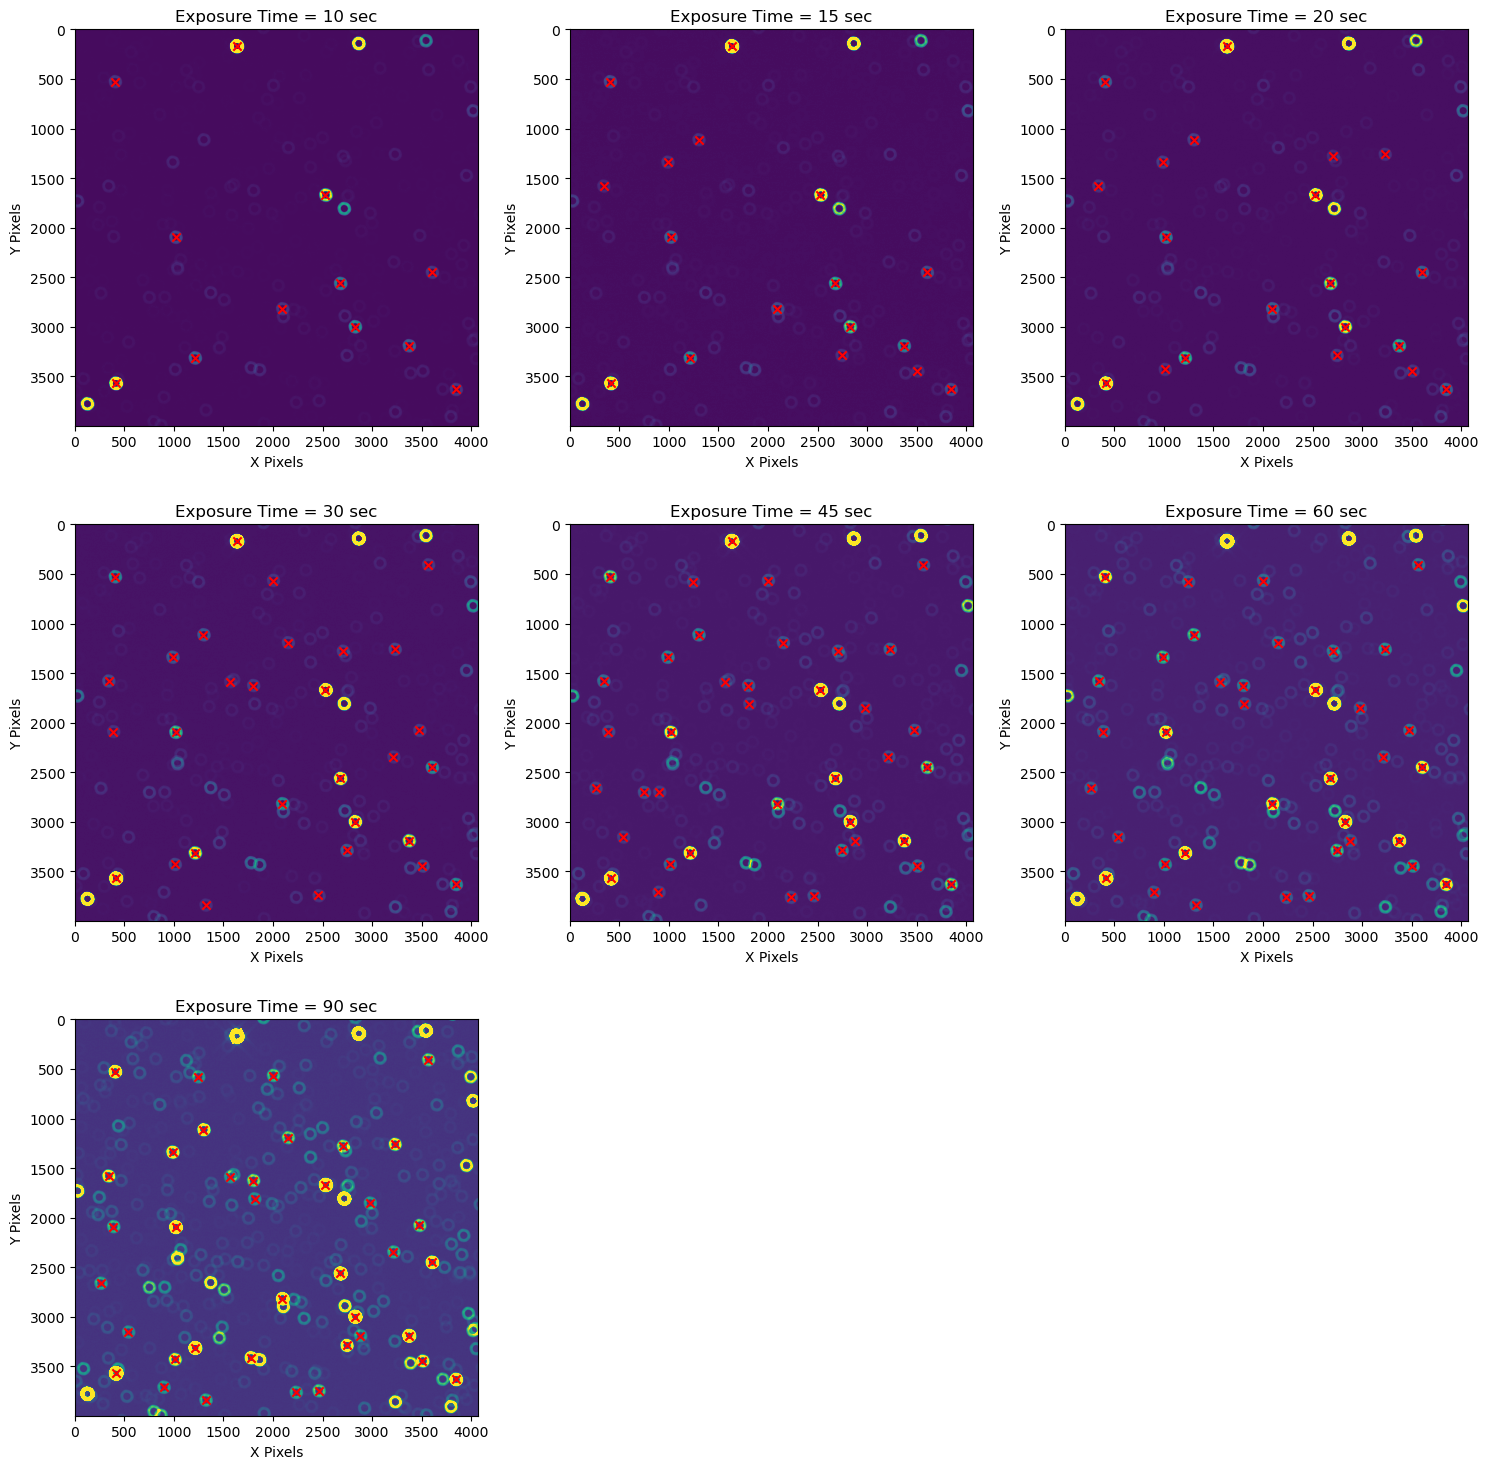

In [14]:
fig = plt.figure(figsize=(15, 15))
det_num = 1
for i, exp_time in zip(np.arange(1, 8), exp_times):
    fig.add_subplot(3,3,i)
    data_id['exposure'] = 7024072600000 + 3 + 3*(i-1)
    data_id['detector'] = det_num
    data_id_visit['exposure'] = 7024072600000 + 3 + 3*(i-1)
    data_id_visit['visit'] = 7024072600000 + 3 + 3*(i-1)
    data_id_visit['detector'] = det_num
    post_isr = butler.get('postISRCCD', dataId=data_id, collections='WET-013/wcsGaiaCatalog')
    plt.imshow(post_isr.image.array, vmax=4000)
    plt.xlabel('X Pixels')
    plt.ylabel('Y Pixels')
    plt.title(f'Exposure Time = {exp_time} sec')
    donut_cat = butler.get('donutCatalog', dataId=data_id_visit, collections='WET-013/directDetectCatalog')
    plt.scatter(donut_cat['centroid_x'], donut_cat['centroid_y'], c='r', marker='x')
plt.tight_layout()

In [11]:
zern_avg_wcs = {}
zern_avg_direct = {}
zern_raw_wcs = {}
zern_raw_direct = {}
zern_metadata_wcs = {}
zern_metadata_direct = {}
for det_num in range(9):
    zern_avg_wcs[det_num] = {}
    zern_avg_direct[det_num] = {}
    zern_raw_wcs[det_num] = {}
    zern_raw_direct[det_num] = {}
    zern_metadata_wcs[det_num] = {}
    zern_metadata_direct[det_num] = {}
    for i, exp_time in zip(np.arange(1, 8), exp_times):
        data_id['exposure'] = 7024072600000 + 3 + 3*(i-1)
        data_id['detector'] = det_num
        data_id_visit['exposure'] = 7024072600000 + 3 + 3*(i-1)
        data_id_visit['visit'] = 7024072600000 + 3 + 3*(i-1)
        data_id_visit['detector'] = det_num
        zern_avg_wcs[det_num][exp_time] = butler.get('zernikeEstimateAvg', dataId=data_id_visit, collections='WET-013/wcsGaiaCatalog')
        zern_avg_direct[det_num][exp_time] = butler.get('zernikeEstimateAvg', dataId=data_id_visit, collections='WET-013/directDetectCatalog')
        zern_raw_wcs[det_num][exp_time] = butler.get('zernikeEstimateRaw', dataId=data_id_visit, collections='WET-013/wcsGaiaCatalog')
        zern_raw_direct[det_num][exp_time] = butler.get('zernikeEstimateRaw', dataId=data_id_visit, collections='WET-013/directDetectCatalog')
        zern_metadata_wcs[det_num][exp_time] = butler.get('calcZernikesTask_metadata', dataId=data_id_visit, collections='WET-013/wcsGaiaCatalog')['calcZernikesTask:combineZernikes'].to_dict()
        zern_metadata_direct[det_num][exp_time] = butler.get('calcZernikesTask_metadata', dataId=data_id_visit, collections='WET-013/directDetectCatalog')['calcZernikesTask:combineZernikes'].to_dict()

In [11]:
opd_fits = fits.open('opd.fits')

det_opd = {}
for det_num in range(9):
    det_header = opd_fits[det_num].header

    opd = []
    for j in range(4, 29):
        opd.append(det_header[f'AZ_{j:03}']*1e-3)    
    det_opd[det_num] = np.array(opd)

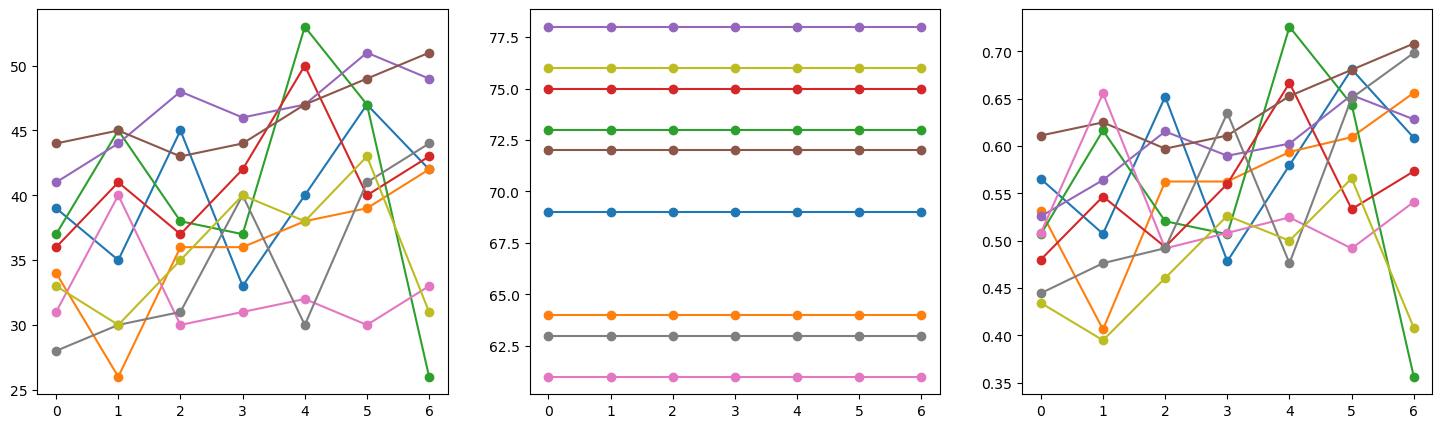

In [15]:
fig = plt.figure(figsize=(18, 5))
fig.add_subplot(1,3,1)
for det_num in range(9):
    plt.plot([x['numDonutsUsed'] for x in zern_metadata_wcs[det_num].values()], '-o')
fig.add_subplot(1,3,2)
for det_num in range(9):
    plt.plot([x['numDonutsTotal'] for x in zern_metadata_wcs[det_num].values()], '-o')
fig.add_subplot(1,3,3)
for det_num in range(9):
    plt.plot([x['numDonutsUsed']/x['numDonutsTotal'] for x in zern_metadata_wcs[det_num].values()], '-o')

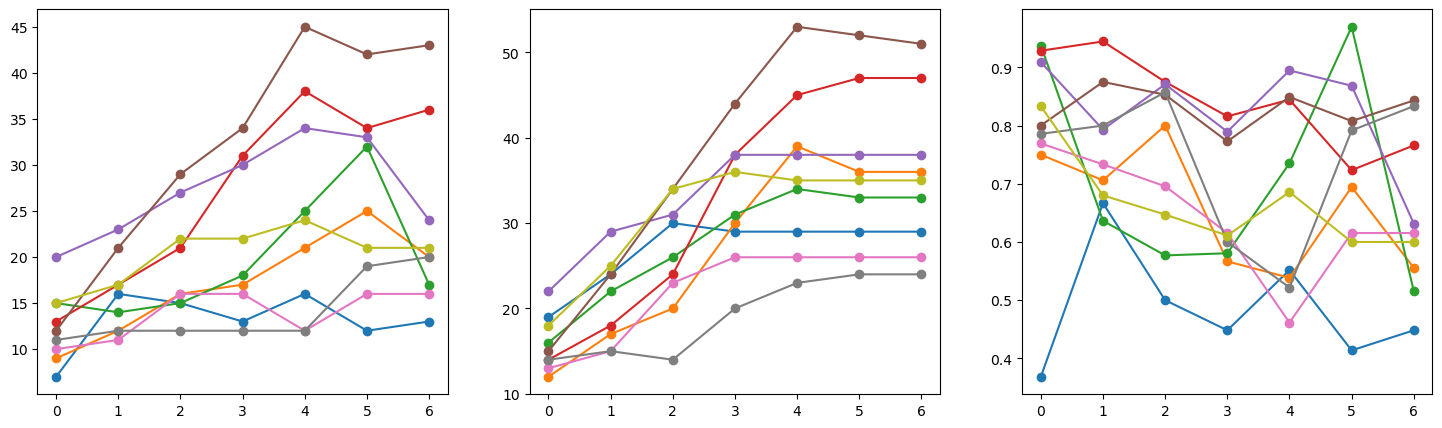

In [16]:
fig = plt.figure(figsize=(18, 5))
fig.add_subplot(1,3,1)
for det_num in range(9):
    plt.plot([x['numDonutsUsed'] for x in zern_metadata_direct[det_num].values()], '-o')
fig.add_subplot(1,3,2)
for det_num in range(9):
    plt.plot([x['numDonutsTotal'] for x in zern_metadata_direct[det_num].values()], '-o')
fig.add_subplot(1,3,3)
for det_num in range(9):
    plt.plot([x['numDonutsUsed']/x['numDonutsTotal'] for x in zern_metadata_direct[det_num].values()], '-o')

In [18]:
butler.registry.queryDatasetTypes()

[DatasetType('gaia_dr2_20200414', {htm7}, SimpleCatalog),
 DatasetType('camera', {instrument}, Camera, isCalibration=True),
 DatasetType('transmission_sensor', {instrument, detector}, TransmissionCurve, isCalibration=True),
 DatasetType('skyMap', {skymap}, SkyMap),
 DatasetType('raw', {band, instrument, detector, physical_filter, exposure}, Exposure),
 DatasetType('packages', {}, Packages),
 DatasetType('isr_log', {band, instrument, detector, physical_filter, exposure}, ButlerLogRecords),
 DatasetType('isr_metadata', {band, instrument, detector, physical_filter, exposure}, TaskMetadata),
 DatasetType('postISRCCD', {band, instrument, detector, physical_filter, exposure}, Exposure),
 DatasetType('isr_config', {}, Config),
 DatasetType('generateDonutCatalogWcsTask_log', {band, instrument, detector, physical_filter, visit}, ButlerLogRecords),
 DatasetType('zernikeEstimateAvg', {band, instrument, detector, physical_filter, visit}, NumpyArray),
 DatasetType('calcZernikesTask_config', {}, Con

In [21]:
list(butler.registry.queryDatasets('donutVisitPairTable', collections='WET-013'))

[DatasetRef(DatasetType('donutVisitPairTable', {instrument}, AstropyTable), {instrument: 'LSSTComCamSim'}, run='WET-013/20240702T223722Z', id=0445647e-3a8f-4af2-b8de-d3e12e03b0ee)]

In [32]:
list(butler.registry.queryDatasets('donutStampsIntra', collections='WET-013/directDetectCatalog'))

[DatasetRef(DatasetType('donutStampsIntra', {band, instrument, detector, physical_filter, visit}, StampsBase), {instrument: 'LSSTComCamSim', detector: 5, visit: 7024072600012, band: 'r', physical_filter: 'r_03'}, run='WET-013/directDetectCatalog/20240703T224953Z', id=9ce7c088-b241-4827-853a-07c66f015c02),
 DatasetRef(DatasetType('donutStampsIntra', {band, instrument, detector, physical_filter, visit}, StampsBase), {instrument: 'LSSTComCamSim', detector: 6, visit: 7024072600006, band: 'r', physical_filter: 'r_03'}, run='WET-013/directDetectCatalog/20240703T224953Z', id=d1def720-0e0b-4da3-8a2a-ce0ff913f64a),
 DatasetRef(DatasetType('donutStampsIntra', {band, instrument, detector, physical_filter, visit}, StampsBase), {instrument: 'LSSTComCamSim', detector: 6, visit: 7024072600018, band: 'r', physical_filter: 'r_03'}, run='WET-013/directDetectCatalog/20240703T224953Z', id=54b71522-e2ac-4d10-8ab9-f1e9b2032410),
 DatasetRef(DatasetType('donutStampsIntra', {band, instrument, detector, physic

In [34]:
ds = butler.get('donutStampsIntra', dataId={'visit': 7024072600012, 'instrument': 'LSSTComCamSim', 'detector': 4}, collections='WET-013/directDetectCatalog')

In [36]:
ds[0]

DonutStamp(stamp_im=lsst.afw.image._maskedImage.MaskedImageF=(image=[[-17.069641  -18.723816  -38.56842   ...   3.2196045  -8.363159
    3.2075195]
 [-49.645264  -28.148071    3.2711792 ...  41.968384   40.308533
   73.378845 ]
 [-56.63617    42.583557  -25.217468  ...  16.454346   47.87091
   24.711365 ]
 ...
 [-36.07892   -21.195679  -22.849182  ... -12.153137  -56.812134
   20.91156  ]
 [-60.81317   -50.89087   -47.583313  ... -27.689514   -4.541931
   -6.20166  ]
 [ -1.6925049 -33.112      41.303406  ...  16.194275   29.419006
   17.836365 ]],
mask=[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], maskPlaneDict={'BAD': 0, 'CR': 3, 'DETECTED': 5, 'DETECTED_NEGATIVE': 6, 'EDGE': 4, 'INTRP': 2, 'NO_DATA': 8, 'SAT': 1, 'SUSPECT': 7}
variance=[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], bbox=(minimum=(404, 

In [37]:
butler.get('donutVisitPairTable', dataId={'instrument': 'LSSTComCamSim'}, collections='WET-013/directDetectCatalog')

<Table length=7>
    extra         intra     ... intra_focusZ      intra_rtp     
    int64         int64     ...   float64          float64      
------------- ------------- ... ------------ -------------------
7024072600003 7024072600001 ...         -1.5 -359.78182915546705
7024072600006 7024072600004 ...         -1.5  -359.7837449293443
7024072600009 7024072600007 ...         -1.5 -359.78565674659967
7024072600012 7024072600010 ...         -1.5  -359.7894685313364
7024072600015 7024072600013 ...         -1.5 -359.79515665912555
7024072600018 7024072600016 ...         -1.5 -359.80080944745976
7024072600021 7024072600019 ...         -1.5  -359.8120095412792

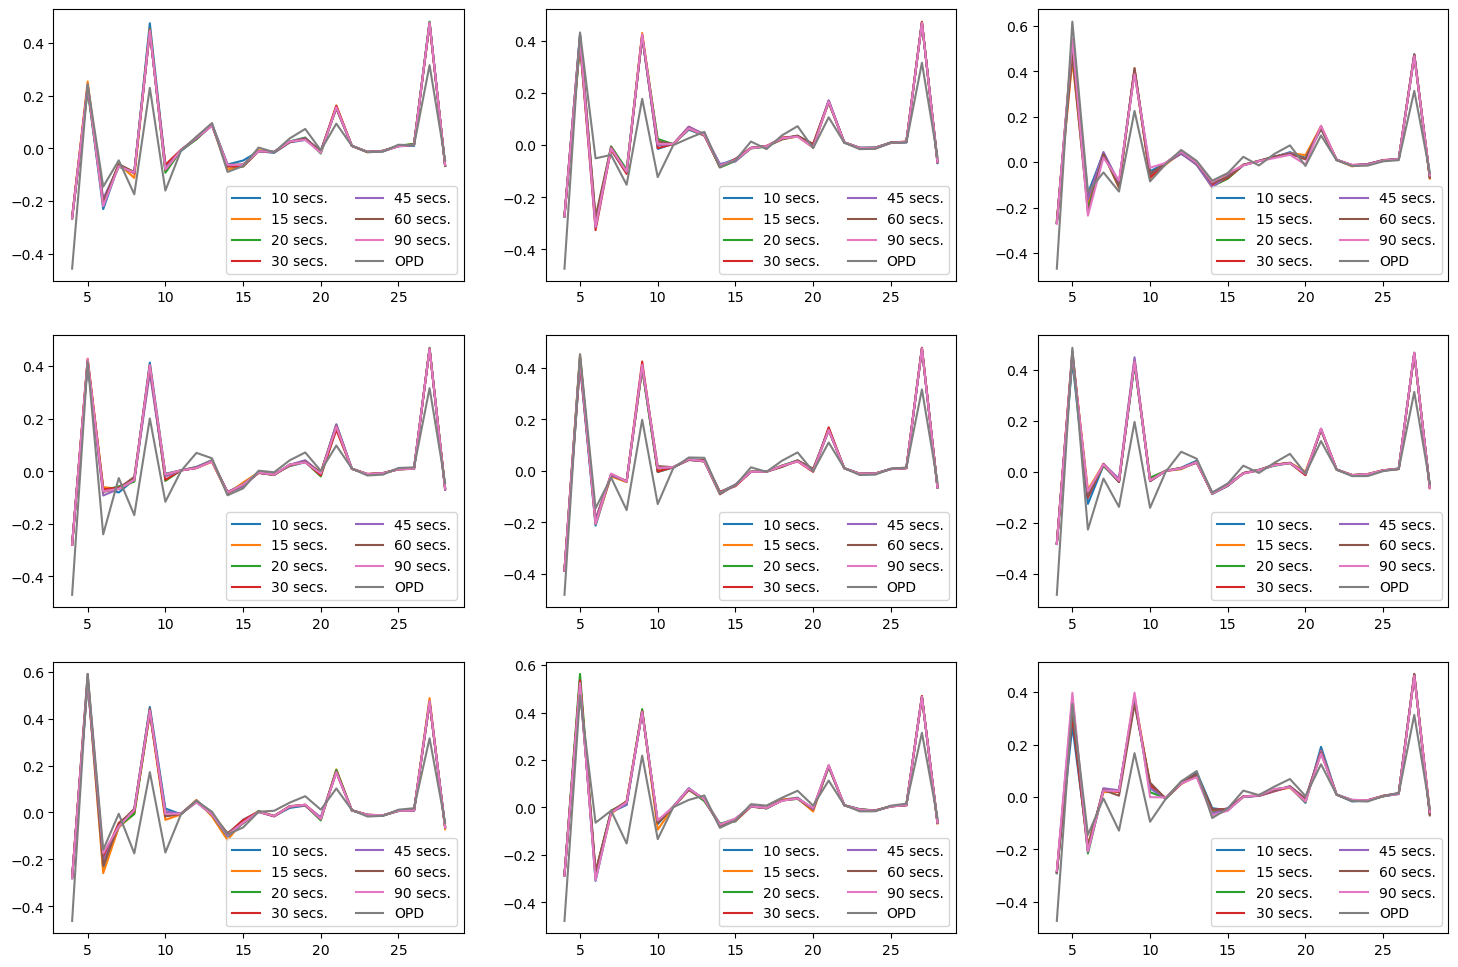

In [38]:
fig = plt.figure(figsize=(18, 12))
for det_num in range(9):
    fig.add_subplot(3,3,det_num+1)
    for exp_time in exp_times:
        plt.plot(np.arange(4, 29), zern_avg_wcs[det_num][exp_time], label=f'{exp_time} secs.')
    plt.plot(np.arange(4, 29), det_opd[det_num], label='OPD')
    plt.legend(ncol=2)

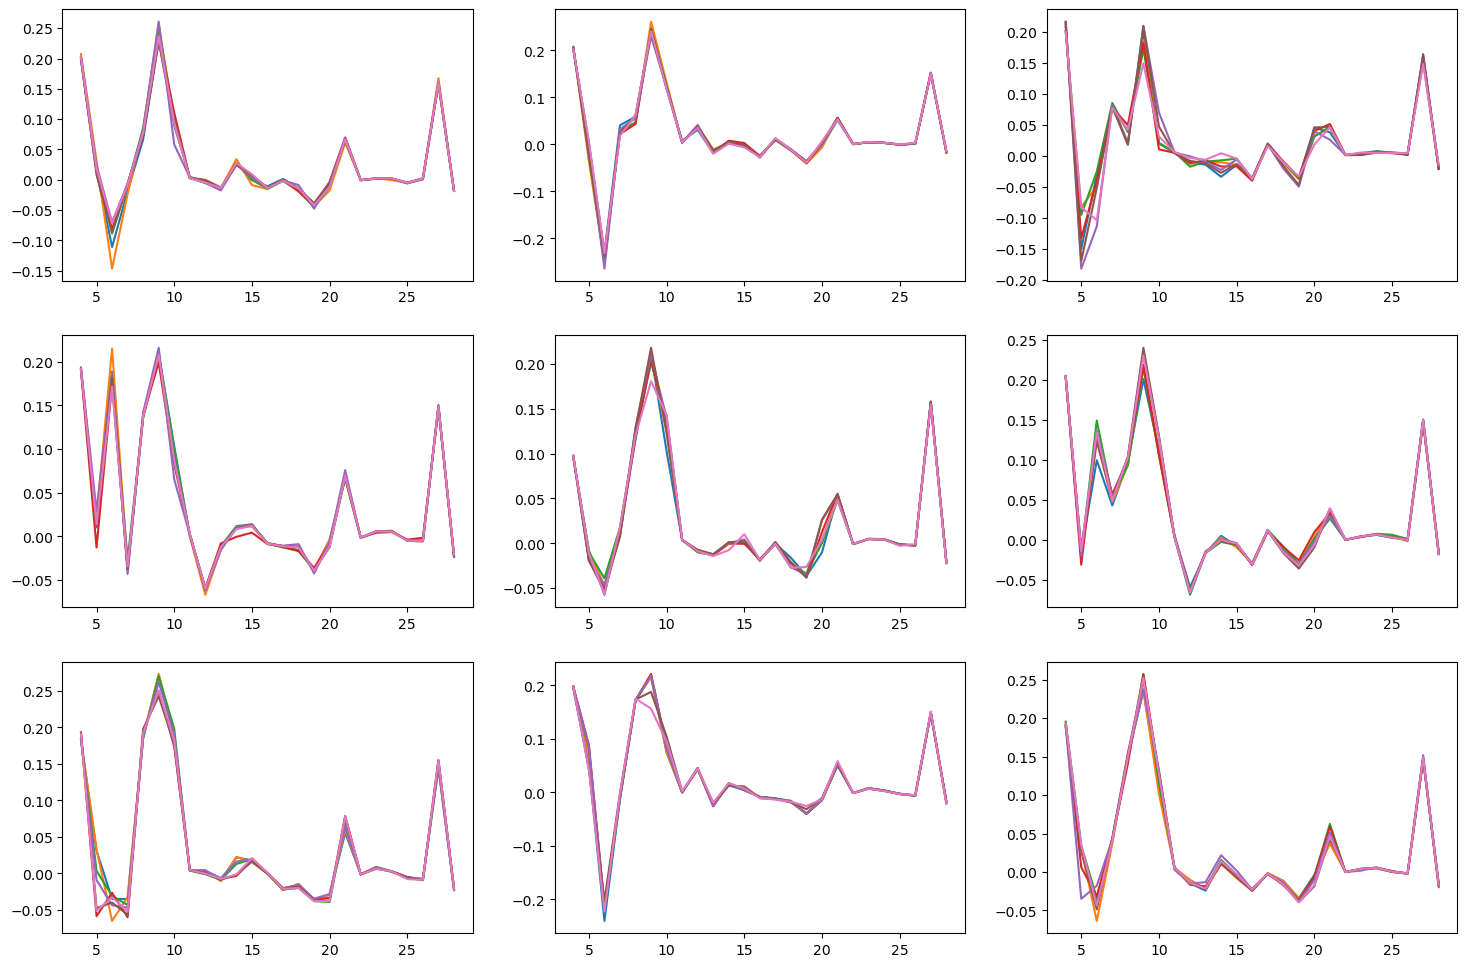

In [40]:
fig = plt.figure(figsize=(18, 12))
for det_num in range(9):
    fig.add_subplot(3,3,det_num+1)
    for exp_time in exp_times:
       plt.plot(np.arange(4, 29), zern_avg_direct[det_num][exp_time]-det_opd[det_num], label=f'{exp_time} secs.')